In [2]:
# Setup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import string
%matplotlib inline

sns.axes_style({'font.family': ['sans-serif'],
        'font.sans-serif': ["Arial"],
        'xtick.labelsize' : 12,
        'ytick.labelsize' : 12,
        'axes.labelsize' : 12,
        });
sns.set(rc={'figure.figsize':tuple([4,4])})
sns.set_palette("pastel")
palette = sns.color_palette()
sns.set_style("whitegrid")

In [15]:
# Load data
problem_id="gem-model-1h"  # CHANGE according to problem
df = pd.read_csv(f"../{problem_id}/results.csv", index_col='Case')
# Add generations
dfg = pd.read_csv(f"../generations/{problem_id}_avg_gen.tsv", sep='\t', index_col='Case')
df = df.join(dfg)

df = df.loc[df["migration_topology"] == "Ring", :]  # Drop random topology since some nodes might be excluded. Also random does not increase max coverage
df.head()

,pop_size,migration_interval,migration_topology,migration_policy,UCoverage,NSolutions,NUSolutions,DeltaP,GD,MinCS,compat_prod,total_prod,gen_avg,gen_std
Case,,,,,,,,,,,,,,
0,100,5,Ring,ReplaceBottom,0.052095,209,180,0.835574,0.021171,2,20,20,113.5,31.6
1,100,5,Ring,Random,0.058002,298,191,0.826203,0.013288,3,20,20,137.1,41.1
4,100,25,Ring,ReplaceBottom,0.059076,269,190,0.757821,0.016256,3,20,20,147.1,41.4
5,100,25,Ring,Random,0.061762,307,218,0.783175,0.019628,2,20,20,147.1,44.4
8,100,50,Ring,ReplaceBottom,0.078410,303,242,0.720379,0.016783,3,20,20,142.4,43.5


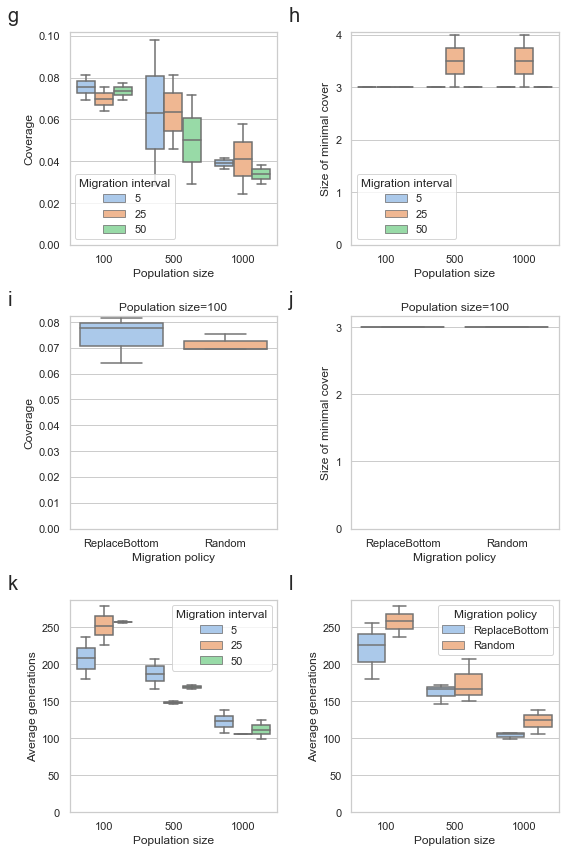

In [14]:
nr=3
nc=2
fig, axs = plt.subplots(nrows=nr, ncols=nc, figsize=(4*nc,4*nr))

# 0
ax = sns.boxplot(x="pop_size", y="UCoverage",hue="migration_interval", data=df, linewidth=1.5, ax=axs[0,0])
ax.set_ylim(0)
ax.set_ylabel("Coverage")
ax.set_xlabel("Population size")
legend = ax.legend()
legend.set_title("Migration interval")

# 1
#ax = sns.boxplot(x="pop_size", y="MinCS", data=df, linewidth=1.5, ax=axs[1], color=palette[3])
ax = sns.boxplot(x="pop_size", y="MinCS",hue="migration_interval", data=df, linewidth=1.5, ax=axs[0,1])
ax.set_ylim(0)
ax.set_ylabel("Size of minimal cover")
ax.set_xlabel("Population size")
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
legend = ax.legend()
legend.set_title("Migration interval")

# 2
selected_ps = 100
df5 = df.loc[df["pop_size"] == selected_ps, :]
#ax = sns.boxplot(x="migration_interval", y="UCoverage", data=df5, linewidth=1.5, boxprops={'facecolor':'None'})
#ax = sns.swarmplot(x="migration_interval", y="UCoverage",hue="migration_policy", data=df5, size=7)
ax = sns.boxplot(x="migration_policy", y="UCoverage", data=df5, linewidth=1.5, ax=axs[1,0])
ax.set_title(f"Population size={selected_ps}");
ax.set_ylim(0)
ax.set_ylabel("Coverage")
ax.set_xlabel("Migration policy")

# 3
ax = sns.boxplot(x="migration_policy", y="MinCS", data=df5, linewidth=1.5, ax=axs[1,1])
ax.set_title(f"Population size={selected_ps}");
ax.set_ylim(0)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_ylabel("Size of minimal cover")
ax.set_xlabel("Migration policy")

# Generations
# 4
ax = sns.boxplot(x="pop_size", y="gen_avg",hue="migration_interval", data=df, linewidth=1.5, ax=axs[2,0])
ax.set_ylim(0)
ax.set_ylabel("Average generations")
ax.set_xlabel("Population size")
legend = ax.legend()
legend.set_title("Migration interval")

# 5
ax = sns.boxplot(x="pop_size", y="gen_avg",hue="migration_policy", data=df, linewidth=1.5, ax=axs[2,1])
ax.set_ylim(0)
ax.set_ylabel("Average generations")
ax.set_xlabel("Population size")
legend = ax.legend()
legend.set_title("Migration policy")

"""
ax = sns.boxplot(x="migration_policy", y="gen_avg", data=df5, linewidth=1.5, ax=axs[2,1])
ax.set_title(f"Population size={selected_ps}");
ax.set_ylim(0)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_ylabel("Average generations")
ax.set_xlabel("Migration policy")
"""

for n, ax in enumerate(axs.flatten()):
    if 'gem-model-2h' == problem_id:
        n = n+6
    ax.text(-0.3, 1.05, string.ascii_lowercase[n], transform=ax.transAxes, 
            size=20)
    

fig.tight_layout() 
plt.savefig(f"./raw/{problem_id}.svgz")

# Other

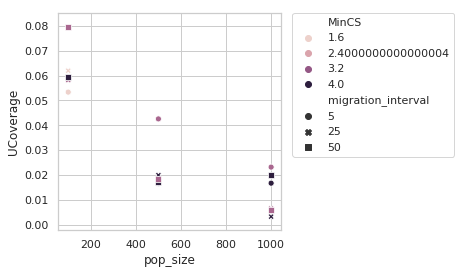

In [52]:
ax = sns.scatterplot(x="pop_size", y="UCoverage", data=df, style="migration_interval", hue="MinCS")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [13]:
# See compatibility
df_1h = pd.read_csv("../gem-model-1h/case_all_out_comp_0p5.csv")
df_2h = pd.read_csv("../gem-model-2h/case_all_out_comp_0p5.csv")

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


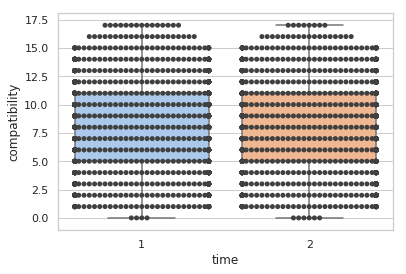

In [14]:
# need a df: compatibility | case
def get_df(indf,hr):
    tdf = indf[['compatibility']]
    tdf['time'] = tdf['compatibility'].map(lambda x: hr)
    return tdf

compat_dist = pd.concat([get_df(df_1h,1), get_df(df_2h,2)])
sns.boxplot(x='time', y='compatibility', data=compat_dist)
sns.swarmplot(x="time", y="compatibility", data=compat_dist, color=".25")